## Observations and Insights 

Here are my observations:
As much as I hated to work with this data because I love animals and don't like the thought of hurting and testing on them, Capomulin and Ramicane treatments appeared to have generated lower Tumor Volumes on average, across both mice genders. This may be due to the higher count of Mice tested, compared to the other drugs. There was also a corelation between the weight and the tumor volume per mouse.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/victoriasandoval/matplotlib-challenge/Mouse_metadata.csv"
study_results_path = "/Users/victoriasandoval/matplotlib-challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df

# Display the data table for preview
merged_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [142]:
# Checking the number of mice.
Mice = merged_df["Mouse ID"].nunique()
Mice

249

In [143]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_df["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [144]:
# Optional: Get all the data for the duplicate mouse ID. 
poor_mouse_df = merged_df.loc[merged_df["Mouse ID"] == "g989"]
poor_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [145]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [146]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [147]:
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [148]:
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [149]:
#Tumor_Variance = np.var(clean_df["Tumor Volume (mm3)"], ddof = 0)
#Tumor_Variance

Tumor_Variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.var , ddof = 0)
Tumor_Variance

Drug Regimen
Capomulin    24.839296
Ceftamin     39.069446
Infubinol    42.886388
Ketapril     68.188930
Naftisol     65.817708
Placebo      60.830138
Propriva     42.943152
Ramicane     23.383692
Stelasyn     59.122106
Zoniferol    48.266689
Name: Tumor Volume (mm3), dtype: float64

In [150]:
#Tumor_SD = np.std(clean_df["Tumor Volume (mm3)"],ddof = 0)
#Tumor_SD

In [151]:
#from scipy import stats
#Tumor_SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.sem , ddof = 0)
#Tumor_SEM


#????????????
#sems = sem(["Tumor Volume (mm3)"])
#a = np.arange(20).reshape(5,4)
#stats.sem(a)

#stats.sem(a, axis=None, ddof=0)


#means = [clean_df["Tumor Volume (mm3)"].mean() for a in x]
#standard_errors = [sem(clean_df["Tumor Volume (mm3)"]) for a in x]
#x_axis = np.arange(0, len(x), 1) + 1


sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [152]:
#Drug_groupby = clean_df.groupby("Drug Regimen")
#Drug_groupby.count()

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Drug_df = pd.DataFrame({"mean": mean, "median": median, "var": Tumor_Variance, "sd": Tumor_SD, "sem": sem})
Drug_df

,mean,median,var,sd,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.382993,50.783528,42.943152,6.553102,0.526358
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Drug_df_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
Drug_df_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [155]:
Drug_groupby = clean_df.groupby("Drug Regimen")["Timepoint"].count()
Drug_groupby

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

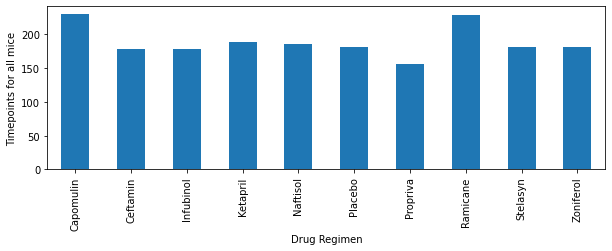

In [178]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby("Drug Regimen")["Timepoint"].count().plot(x="Drug Regimen", y = "Timepoint", kind='bar', figsize = (10, 3))
plt.ylabel("Timepoints for all mice")
plt.show()

In [157]:
#??
#x_axis = np.arange(len(Drug_groupby))
#x_axis

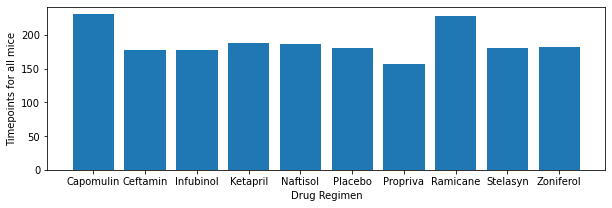

In [179]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#plt.bar(x_axis, Drug_groupby, color="b", align="center", labels=[Drug_groupby.index()])
#plt.show()

#plt.bar(x_axis, Drug_groupby, color="b", align="center")
#plt.show()

#counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 3))
plt.bar(Drug_groupby.index.values,Drug_groupby.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints for all mice")
plt.show()

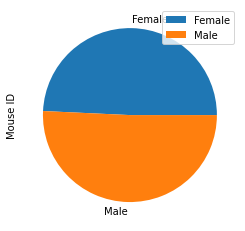

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby("Sex").count().plot(x="Sex", y = "Mouse ID", kind='pie')
plt.show()

In [160]:
sex_groupby = clean_df.groupby("Sex")["Mouse ID"].count()
sex_groupby

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

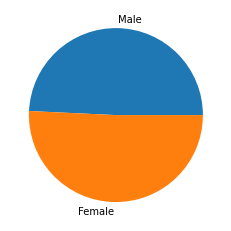

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df["Sex"].unique()
labels

plt.pie(sex_groupby, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [162]:
Final_Tumor_Volume = clean_df.loc[(clean_df["Timepoint"] == 45) & (clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin")].groupby(["Mouse ID"])
Final_Tumor_Volume.max()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Final_Tumor_Volume2 = clean_df.groupby(["Mouse ID"]).max()
Final_Tumor_Volume2 = Final_Tumor_Volume2.reset_index()
Final_Tumor_Volume2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [164]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merged_df = pd.merge(clean_df, Final_Tumor_Volume2, on="Mouse ID")
new_merged_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,45.000000,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,45.000000,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,45.000000,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,45.000000,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,45.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,Male,9,30,45,73.867845,4
1884,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,Male,9,30,45,73.867845,4
1885,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,Male,9,30,45,73.867845,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,Male,9,30,45,73.867845,4


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    Final_Tumor_Volume2 = new_merged_df.loc[(new_merged_df["Drug Regimen_y"] == drug), "Tumor Volume (mm3)_y"]

In [166]:
# add subset 
tumor_vol_data.append(Final_Tumor_Volume2)


# Determine outliers using upper and lower bounds
quartiles = Final_Tumor_Volume2.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 52.25999677499999 could be outliers.
Values above 72.21174041500001 could be outliers.


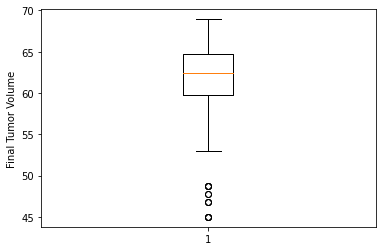

In [180]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_data)
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

In [168]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Final_Tumor_Volume3 = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"])
Final_Tumor_Volume3.max().head(1)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2


In [169]:
Final_Tumor_Volume_b128 = clean_df.loc[(clean_df["Mouse ID"] == "b128")]
Final_Tumor_Volume_b128["Tumor Volume (mm3)"], ["Timepoint"]

(300    45.000000
 301    45.651331
 302    43.270852
 303    43.784893
 304    42.731552
 305    43.262145
 306    40.605335
 307    37.967644
 308    38.379726
 309    38.982878
 Name: Tumor Volume (mm3), dtype: float64,
 ['Timepoint'])

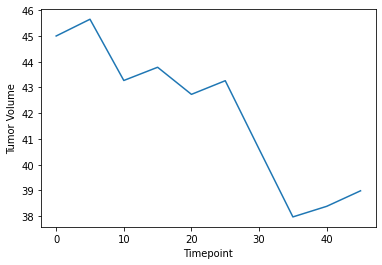

In [182]:
plt.plot(Final_Tumor_Volume_b128["Timepoint"],Final_Tumor_Volume_b128["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [172]:
clean_df["Tumor Volume (mm3)"]

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor Volume (mm3), Length: 1888, dtype: float64

In [173]:
Final_Tumor_Volume5 = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"]).mean()[["Weight (g)", "Tumor Volume (mm3)"]]
Final_Tumor_Volume5

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [174]:
x_axis = np.arange(len(Final_Tumor_Volume5))
x_axis


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

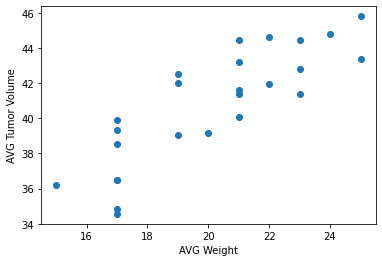

In [183]:
plt.scatter(Final_Tumor_Volume5["Weight (g)"], Final_Tumor_Volume5["Tumor Volume (mm3)"])
plt.xlabel("AVG Weight")
plt.ylabel("AVG Tumor Volume")
plt.show()

## Correlation and Regression

In [176]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Weight = Final_Tumor_Volume5["Weight (g)"]
Tumor = Final_Tumor_Volume5["Tumor Volume (mm3)"]
correlation = st.pearsonr(Weight, Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


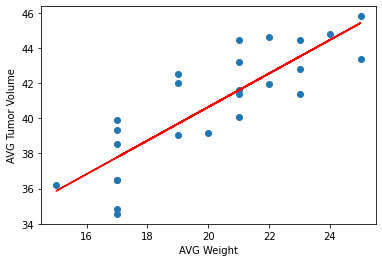

In [184]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, Tumor)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Weight,Tumor)
plt.plot(Weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("AVG Weight")
plt.ylabel("AVG Tumor Volume")
plt.show()